<a href="https://colab.research.google.com/github/ayanbizz/deep-learning/blob/master/GD_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.colors

from matplotlib import animation, rc
from IPython.display import HTML

import numpy as np

In [0]:
class SN:
  
  def __init__(self, w_init, b_init, algo):
    self.w = w_init
    self.b = b_init
    self.w_h = []
    self.b_h = []
    self.e_h = []
    self.algo = algo
    
  def sigmoid(self, x, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    return 1. / (1. + np.exp(-(w*x + b)))
  
  def error(self, X, Y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    err = 0
    for x, y in zip(X, Y):
      err +=  0.5 *(self.sigmoid(x, w, b) - y) ** 2
    return err
  
  def grad_w(self, x, y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    y_pred = self.sigmoid(x, w, b)
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    y_pred = self.sigmoid(x, w, b)
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, 
          epochs=100, eta=0.01
         ):
    self.w_h = []
    self.b_h = []
    self.e_h = []
    self.X = X
    self.Y = Y
    
    if self.algo == 'GD':
      for i in range(epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        self.w -= eta * dw / X.shape[0]
        self.b -= eta * db / X.shape[0]
        self.append_log()
        
  def append_log(self):
    self.w_h.append(self.w)
    self.b_h.append(self.b)
    self.e_h.append(self.error(self.X, self.Y))

In [0]:
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])

algo = 'GD'

w_init = -3
b_init = 4

w_min = -7
w_max = 5

b_min = -7
b_max = 5

epochs = 1000
eta = 1

animation_frames = 10
plot_2d = True


In [0]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta)

In [0]:
def plot_animate_2d(i):
  i = int(i*(epochs/animation_frames))
  line.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
  title.set_text('Epoch: {: d}, Error: {:.4f}'.format(i, sn.e_h[i]))
  
  return line, title

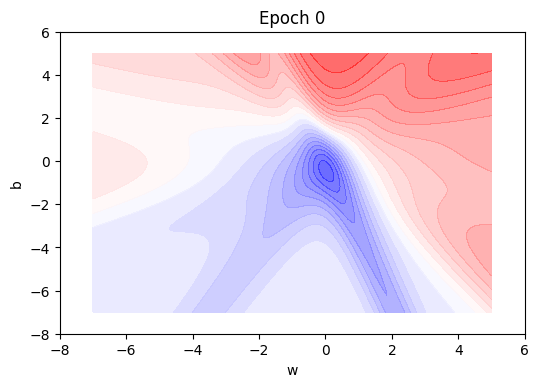

In [160]:
  W = np.linspace(w_min, w_max, 256)
  b = np.linspace(b_min, b_max, 256)
  WW, BB = np.meshgrid(W, b)
  Z = sn.error(X, Y, WW, BB)

  fig = plt.figure(dpi=100)
  ax = plt.subplot(111)
  ax.set_xlabel('w')
  ax.set_xlim(w_min - 1, w_max + 1)
  ax.set_ylabel('b')
  ax.set_ylim(b_min - 1, b_max + 1)
  title = ax.set_title('Epoch 0')
  cset = plt.contourf(WW, BB, Z, 25, alpha=0.6, cmap=cm.bwr)
  plt.show()


In [161]:
i = 0
line, = ax.plot(sn.w_h[:i+1], sn.b_h[:i+1], color='black',marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_2d, frames=animation_frames)
rc('animation', html='jshtml')
anim

 